## 3 Observed trends
    One trend we can see is that with more drivers there is more rides so the average fare tends to be much lower than places with less drivers so the average fare is much higher in rural than urban cities. 
    
    Another trend is that urban cities tend to have many more drivers so the average fare is lower which in turn makes people more likely to get rides through the company so a large portion of total fares come from urban cities even though the average fare is much lower.
    
    And a final trend we can see is that drivers would more likely be in urban cities since there is more rides to be had since the fare price is such that people would more likely want to use the company and get a ride. that is why urban is the highest percentage for all the pies charts.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_df  = pd.merge(city_df,ride_df)
# Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
city_group = combined_df.groupby('city')

In [3]:
avg_fare_pc = city_group['fare'].mean()

In [4]:
total_num_rpc = city_group['ride_id'].count()

In [5]:
total_num_dpc = city_group['driver_count'].mean()

In [6]:
type_city = city_df.set_index('city')['type']

In [7]:
key_variablies = pd.DataFrame\
({'Average Fare':avg_fare_pc,\
  'Total Number of Rides':total_num_rpc,\
  'Total Number of Drivers':total_num_dpc,'City Type':type_city})
key_variablies.head()

,Average Fare,Total Number of Rides,Total Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [8]:
Rural_city = key_variablies.loc[key_variablies['City Type'] == 'Rural']
RX = Rural_city['Total Number of Rides']
RY = Rural_city['Average Fare']
R_size = Rural_city['Total Number of Drivers']
#Rural_city.head()

In [9]:
Urban_city = key_variablies.loc[key_variablies['City Type'] == 'Urban']
UX = Urban_city['Total Number of Rides']
UY = Urban_city['Average Fare']
U_size = Urban_city['Total Number of Drivers']
#Urban_city.head()

In [10]:
Suburb_city = key_variablies.loc[key_variablies['City Type'] == 'Suburban']
SX = Suburb_city['Total Number of Rides']
SY = Suburb_city['Average Fare']
S_size = Suburb_city['Total Number of Drivers']
#Suburb_city.head()

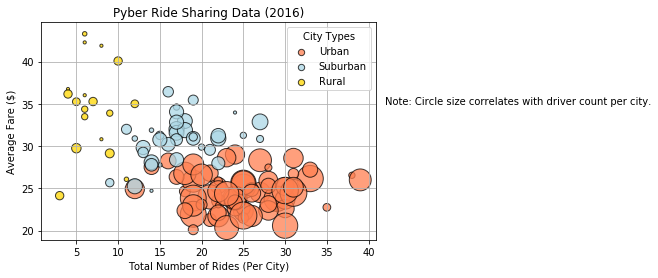

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(UX, UY, s = U_size*10, c = 'coral', edgecolors = 'black', alpha = .75, label = 'Urban')
plt.scatter(SX, SY, s = S_size*10, c = 'lightblue', edgecolors = 'black', alpha = .75, label = 'Suburban')
plt.scatter(RX, RY, s = R_size*10, c = 'gold', edgecolors = 'black', alpha = .75, label = 'Rural')
legend = plt.legend( title= "City Types", loc="best")
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]
plt.grid()
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.text(42, 35,'Note: Circle size correlates with driver count per city.')
plt.show()
plt.savefig("../Images/Pyber_Ride_Sharing_Data.png")

In [12]:
type_group = combined_df.groupby('type')

In [13]:
fare_sum = type_group['fare'].sum()
explode = (0,0,0.1)
labels = ['Rural','Suburban','Urban']
colors = ['gold','lightblue','coral']

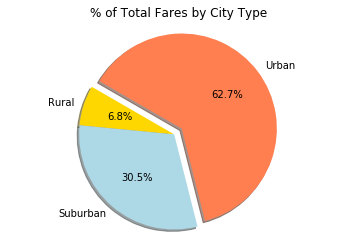

<Figure size 432x288 with 0 Axes>

In [14]:
plt.pie(fare_sum, explode = explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
plt.title('% of Total Fares by City Type')
plt.show()
plt.savefig("../Images/%_Total_Fares_by_City_Type.png")

In [15]:
ride_count = type_group['ride_id'].count()

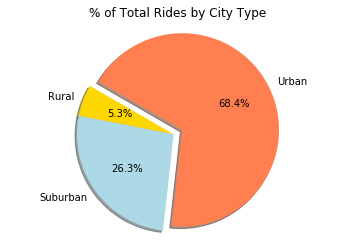

<Figure size 432x288 with 0 Axes>

In [16]:
plt.pie(ride_count, explode = explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
plt.title('% of Total Rides by City Type')
plt.show()
plt.savefig("../Images/%_of_Total_Rides_by_City_Type.png")

In [17]:
total_drivers = city_df.groupby('type')['driver_count'].sum()

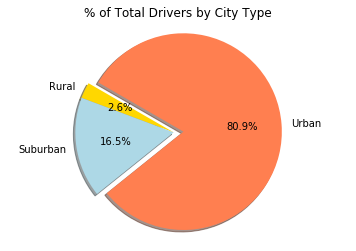

<Figure size 432x288 with 0 Axes>

In [18]:
plt.pie(total_drivers, explode = explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
plt.title('% of Total Drivers by City Type')
plt.show()
plt.savefig('../Images/%_of_Total_Drivers_by_City_Type.png')